# Machine Learning

## classification

### 생선 분류 문제
+ 데이터를 기반으로 도미와 빙어 구분
- 이진 분류

#### 도미(bream), 빙어(smelt) 데이터 생성

In [1]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

#### 도미, 빙어 데이터를 그래프로 표현
- 도미 : 파랑색,  빙어 : 주황색

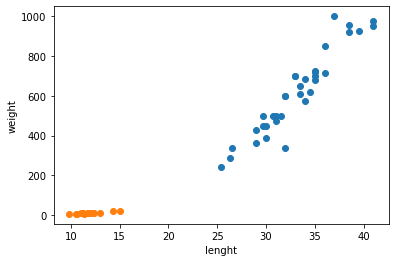

In [2]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('lenght')
plt.ylabel('weight')
plt.show()

## KNN (K-Nearest Neighbors) 알고리즘

In [3]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

### 사이킷런(scikit-learn) 사용
- 각 특성의 리스트를 세로 방향으로 늘어뜨린 2차원 리스트를 생성해야함

In [4]:
fish_data = [[l, w] for l, w in zip(length, weight)]

print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


* 정답 데이터 생성
    - 1: 도미, 0: 빙어

In [5]:
fish_target = [1]*35 + [0]*14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


* KNeighborsClassifier : KNN (k-최근접 이웃) 알고리즘을 구현한 클래스

In [6]:
from sklearn.neighbors import KNeighborsClassifier

* KNeighborsClassifier 클래스의 객체 생성

In [7]:
kn = KNeighborsClassifier()

* fit() : 훈련 메서드
    - fish_data, fish_target을 전달하여 도미를 찾기 위한 기준 학습

In [8]:
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

* score() : 얼마나 훈련이 잘 되었는지 평가
    - score() 점수의 범위 : 0 ~ 1 (1 = 100%)
    - 점수 = 정확도(accuracy)

In [9]:
kn.score(fish_data, fish_target)

1.0

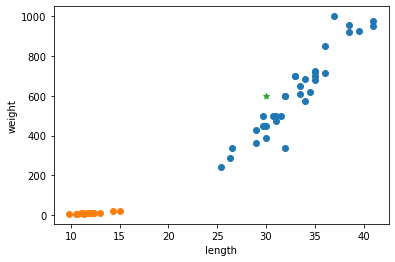

In [10]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker='*')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

* 생선 종류 예측 (길이: 30, 무게: 600)
* predict() 사용

In [11]:
kn.predict([[30,600]])

array([1])

* _fit_X : fish_data
+ _y : fish_target

In [12]:
print(kn._fit_X)
print(kn._y)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


* KNeighborsClassifier 클래스는 기본적으로 5개 값을 비교함
* 이 기준은 n_neighbors 매개변수로 변경 가능

In [13]:
# 49개를 모두 비교하면 다수는 무조건 도미
kn49 = KNeighborsClassifier(n_neighbors=49)

In [14]:
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

* 도미만 올바르게 맞히기 때문에 정확도 : 35/49

In [15]:
print(35/49)

0.7142857142857143


+ n_neighbors 값에 따른 score 점수 변화 

In [16]:
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

for n in range(5, 50):
    kn.n_neighbors = n
    score = kn.score(fish_data, fish_target)
    print("n_neighbors: {} - score: {}".format(n, score))

n_neighbors: 5 - score: 1.0
n_neighbors: 6 - score: 1.0
n_neighbors: 7 - score: 1.0
n_neighbors: 8 - score: 1.0
n_neighbors: 9 - score: 1.0
n_neighbors: 10 - score: 1.0
n_neighbors: 11 - score: 1.0
n_neighbors: 12 - score: 1.0
n_neighbors: 13 - score: 1.0
n_neighbors: 14 - score: 1.0
n_neighbors: 15 - score: 1.0
n_neighbors: 16 - score: 1.0
n_neighbors: 17 - score: 1.0
n_neighbors: 18 - score: 0.9795918367346939
n_neighbors: 19 - score: 0.9795918367346939
n_neighbors: 20 - score: 0.9795918367346939
n_neighbors: 21 - score: 0.9795918367346939
n_neighbors: 22 - score: 0.9795918367346939
n_neighbors: 23 - score: 0.9795918367346939
n_neighbors: 24 - score: 0.9795918367346939
n_neighbors: 25 - score: 0.9795918367346939
n_neighbors: 26 - score: 0.9795918367346939
n_neighbors: 27 - score: 0.9795918367346939
n_neighbors: 28 - score: 0.9591836734693877
n_neighbors: 29 - score: 0.7142857142857143
n_neighbors: 30 - score: 0.7142857142857143
n_neighbors: 31 - score: 0.7142857142857143
n_neighbors:

# 훈련 데이터와 테스트 데이터

## 훈련 데이터
- 훈련에 사용되는 데이터 (training set)

## 테스트 데이터
- 평가에 사용하는 데이터 (test set)

### numpy를 사용하여 샘플링 편향 (sampling bias) 방지

In [17]:
import numpy as np

In [18]:
fish_data

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [19]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [20]:
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

In [21]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [22]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

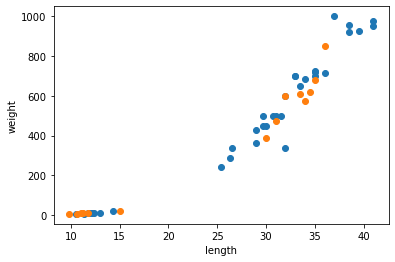

In [23]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

* 파랑색: 훈련 데이터
* 주황색 : 테스트 데이터

In [24]:
kn = kn.fit(train_input, train_target)

* fit() 메서드를 실행할 때마다 이전에 학습한 모든 것을 잃어버림. 이전에 모델을 그대로 두고 싶다면 객체를 새로 생성해야함

In [25]:
kn.n_neighbors = 5

In [26]:
kn.score(test_input, test_target)

1.0

In [27]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [28]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

# 데이터 전처리

## 넘파이로 데이터 준비

In [29]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [30]:
fish_data = np.column_stack((fish_length, fish_weight))

In [31]:
fish_data[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

In [32]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [33]:
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## 사이킷런으로 훈련 세트와 테스트 세트 나누기
+ train_test_split()
+ 전달되는 리스트나 배열을 비율에 맞게 training set와 test set로 섞어서 나누어 준다.

#### 옵션 값 설명
* test_size: 
    * 테스트 셋 구성의 비율을 나타낸다.
    * train_size의 옵션과 반대 관계에 있는 옵션 값이며, 주로 test_size를 지정한다.
    * test_size=0.2 : 전체 데이터 셋의 20%를 test (validation) 셋으로 지정하겠다는 의미. (default = 0.25)  
* shuffle:
    * 데이터를 split 해주기 이전에 섞을것인지 결정
    * True : 섞음 (default = True)
* stratify: 
    * classification을 다룰 때 매우 중요한 옵션값
    * stratify 값을 target으로 지정해주면, 각각의 class 비율(ratio)을 train / test에 유지한다. (한 쪽에 쏠려서 분배되는 것을 방지)
    *  만약 이 옵션을 지정해 주지 않고 classification 문제를 다룬다면, 성능의 차이가 많이 날 수 있음.
* random_state:
    * 세트를 섞을 때 해당 int 값을 보고 섞으며, 하이퍼 파라미터를 튜닝시 이 값을 고정해두고 튜닝해야 매번 데이터셋이 변경되는 것을 방지할 수 있다.


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

* 훈련 세트와 테스트 세트에 샘플의 클래스 비율이 일정하지 않다면, 모델이 일부 샘플을 올바르게 학습 불가 
* train_test_split() 함수의 stratify 매개변수에 타깃 데이터를 전달하면 클래스 비율에 맞게 데이터 저장
* 훈련 데이터가 작거나 특정 클래스의 샘플 개수가 적을 때 특히 유용 

In [36]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42)

In [37]:
train_input, test_input, train_target, test_target

(array([[  29.7,  500. ],
        [  12.2,   12.2],
        [  33. ,  700. ],
        [  11.3,    8.7],
        [  39.5,  925. ],
        [  29. ,  430. ],
        [  36. ,  714. ],
        [  36. ,  850. ],
        [  31. ,  475. ],
        [  35. ,  720. ],
        [  37. , 1000. ],
        [  11.2,    9.8],
        [  34.5,  620. ],
        [  12. ,    9.8],
        [  29. ,  363. ],
        [  33. ,  700. ],
        [  30.7,  500. ],
        [  38.5,  955. ],
        [  33.5,  650. ],
        [  14.3,   19.7],
        [  31.5,  500. ],
        [  25.4,  242. ],
        [   9.8,    6.7],
        [  32. ,  600. ],
        [  10.5,    7.5],
        [  33.5,  610. ],
        [  10.6,    7. ],
        [  35. ,  700. ],
        [  32. ,  600. ],
        [  35. ,  725. ],
        [  13. ,   12.2],
        [  30. ,  450. ],
        [  32. ,  340. ],
        [  15. ,   19.9],
        [  30. ,  390. ],
        [  41. ,  975. ]]),
 array([[ 11. ,   9.7],
        [ 11.8,   9.9],
        [ 29.7

In [38]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

* 수상한 도미 한 마리
* 길이: 25, 무게: 150

In [39]:
kn.predict([[25, 150]])

array([0.])

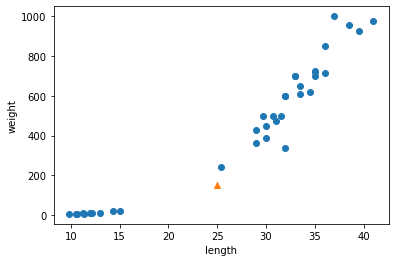

In [40]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

* 그래프를 보면 누가봐도 도미인데, 빙어라고 예측함
* kneighbors() 메서드를 사용하여 수상한 도미와 샘플에서 가장 가까운 이웃을 찾아보자
* kneighbors(): 이웃까지의 거리와 이웃 샘플의 인덱스를 반환
* K-NN의 기본값은 5를 사용했기 때문에 5개를 반환

In [41]:
distances, indexes = kn.kneighbors([[25, 150]])

In [42]:
print(distances, indexes)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]] [[21 33 19 30  1]]


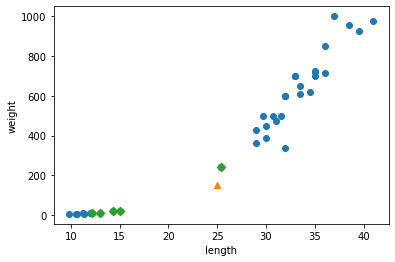

In [43]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

* 1개가 도미, 4개가 빙어이므로 다수인 빙어로 예측

In [44]:
print(train_input[indexes])
print(train_target[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]
[[1. 0. 0. 0. 0.]]


### 기준을 맞춰라

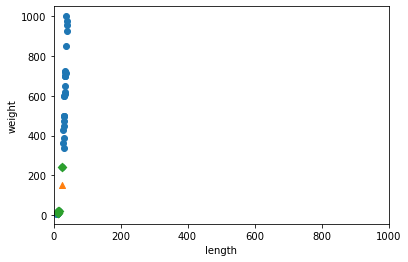

In [45]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

* 두 특성(길이와 무게)의 값이 놓인 범위가 매우 다르다. 즉, 두 특성의 스케일(scale)이 다르다
* 특성 간 스케일이 다른 일은 매우 흔하다. 어떤 사람이 방의 넓이를 재는데 세로는 cm로 가로는 inch로 쟀다면 정사각형 방도 직사각형처럼 보일 것이다.
* 데이터를 표현하는 기준이 다르면, 알고리즘이 올바르게 예측할 수 없다. 
* 따라서, 특성값을 일정한 기준으로 맞춰 주어야 한다
* 이런 작업을 데이터 전처리(data preprocessing)라고 한다

#### 표준 점수 (standard score, z-score)
* 가장 널리 사용하는 전처리 방법 중 하나
* 표준점수는 각 특성값이 0에서 표준편차의 몇 배만큼 떨어져 있는지를 나타낸다. 
* 이를 통해, 실제 특성값의 크기와 상관없이 동일한 조건으로 비교할수 있다. 

In [46]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [47]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [48]:
train_scaled = (train_input - mean) / std
print(train_scaled)

[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]
 [-1.60253587 -1.37766373]
 [ 1.22242404  1.45655528]
 [ 0.17057727 -0.07453542]
 [ 0.87180845  0.80390854]
 [ 0.87180845  1.22457184]
 [ 0.37092904  0.06465464]
 [ 0.77163257  0.82246721]
 [ 0.97198434  1.68853872]
 [-1.61255346 -1.3742613 ]
 [ 0.72154463  0.51315596]
 [-1.53241275 -1.3742613 ]
 [ 0.17057727 -0.28177396]
 [ 0.5712808   0.76060496]
 [ 0.34087627  0.14198246]
 [ 1.12224816  1.54934866]
 [ 0.62136874  0.60594934]
 [-1.30200822 -1.34363949]
 [ 0.42101698  0.14198246]
 [-0.19005591 -0.65604058]
 [-1.75279969 -1.38384995]
 [ 0.47110492  0.45129371]
 [-1.68267658 -1.38137546]
 [ 0.62136874  0.48222484]
 [-1.67265899 -1.38292202]
 [ 0.77163257  0.76060496]
 [ 0.47110492  0.45129371]
 [ 0.77163257  0.83793278]
 [-1.43223687 -1.36683783]
 [ 0.27075315 -0.01267317]
 [ 0.47110492 -0.35291555]
 [-1.2318851  -1.34302087]
 [ 0.27075315 -0.19825992]
 [ 1.37268787  1.61121091]]


### 위의 전처리된 데이터로 모델 훈련하기

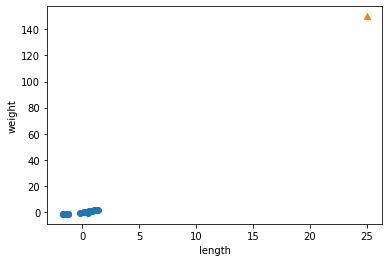

In [49]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

* 데이터가 전처리 되었으므로, 비교 데이터도 알맞게 전처리 수행해야함

In [50]:
new = ([25, 150] - mean) / std

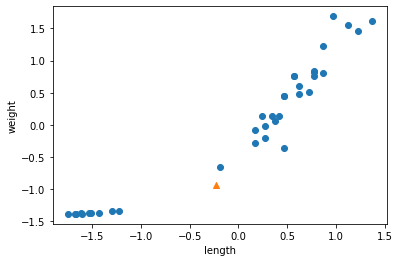

In [51]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [52]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

* 훈련을 마치고 테스트 세트로 평가할 때 주의할 점: 
* 테스트 세트도 훈련 세트처럼 전처리를 수행해야 함
* 그렇지 않으면, 데이터의 스케일이 같아지지 않으므로, 훈련한 모델이 쓸모없어짐

In [53]:
test_scaled = (test_input - mean) / std

In [54]:
kn.score(test_scaled, test_target)

1.0

#### 이제 새롭게 예측해보자

In [55]:
print(kn.predict([new]))

[1.]


* 처음에는 빙어로 예측했지만, 데이터 전처리를 수행하고 다시 예측해보니 도미로 올바르게 예측함

In [56]:
distances, indexes = kn.kneighbors([new])

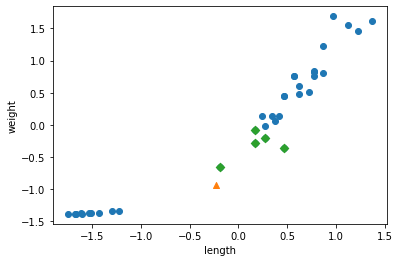

In [57]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()